<a href="https://colab.research.google.com/github/Gab-Reis-CS/MVP-PUC-Rio-/blob/main/MVP_(prf)_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Gabriel Reis de Castro Santos

**Matrícula:** 4052025000594

**Dataset:** [PRF Dataset](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema

Os dados abertos da Polícia Rodoviária Federal (PRF) fornecem registros detalhados sobre acidentes de trânsito ocorridos nas rodovias federais brasileiras. Esses registros incluem variáveis como data, horário, local, tipo de acidente, número de feridos, mortos, condições climáticas, tipo de pista, entre outros fatores.

O objetivo principal deste projeto é analisar os fatores que influenciam a gravidade dos acidentes e, possivelmente, prever a gravidade de um acidente com base em variáveis contextuais.

## Hipóteses do Problema

As hipóteses que traçadas são as seguintes:

Certas condições climáticas ou de iluminação aumentam a gravidade dos acidentes? Hipótese: Acidentes sob chuva e à noite tendem a ser mais graves.

O tipo de pista (simples ou dupla) e o traçado da via (reta ou curva) influenciam o número de vítimas? Hipótese: Acidentes em pistas simples e curvas são mais propensos a resultarem em óbitos.

É possível prever a gravidade do acidente (sem vítimas, com feridos, com mortos) com base nas variáveis disponíveis? Hipótese: As variáveis do dataset são suficientes para treinar modelos de classificação com desempenho aceitável.

Existe um padrão temporal para a ocorrência de acidentes mais graves (horário, dia da semana, feriados)? Hipótese: Finais de semana e feriados concentram os acidentes mais letais.

## Tipo de Problema

Este é um problema de **classificação supervisionada (multiclasse)**, no qual o objetivo é prever a gravidade do acidente com base em variáveis contextuais.

## Seleção de Dados

Os dados utilizados são provenientes do portal oficial da Polícia Rodoviária Federal, disponível no seguinte endereço:
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

Esses dados são públicos, periodicamente atualizados e abrangem desde 2007 até o presente.

## Atributos do Dataset/Metadados

O dataset PRF possui trinta atributos:
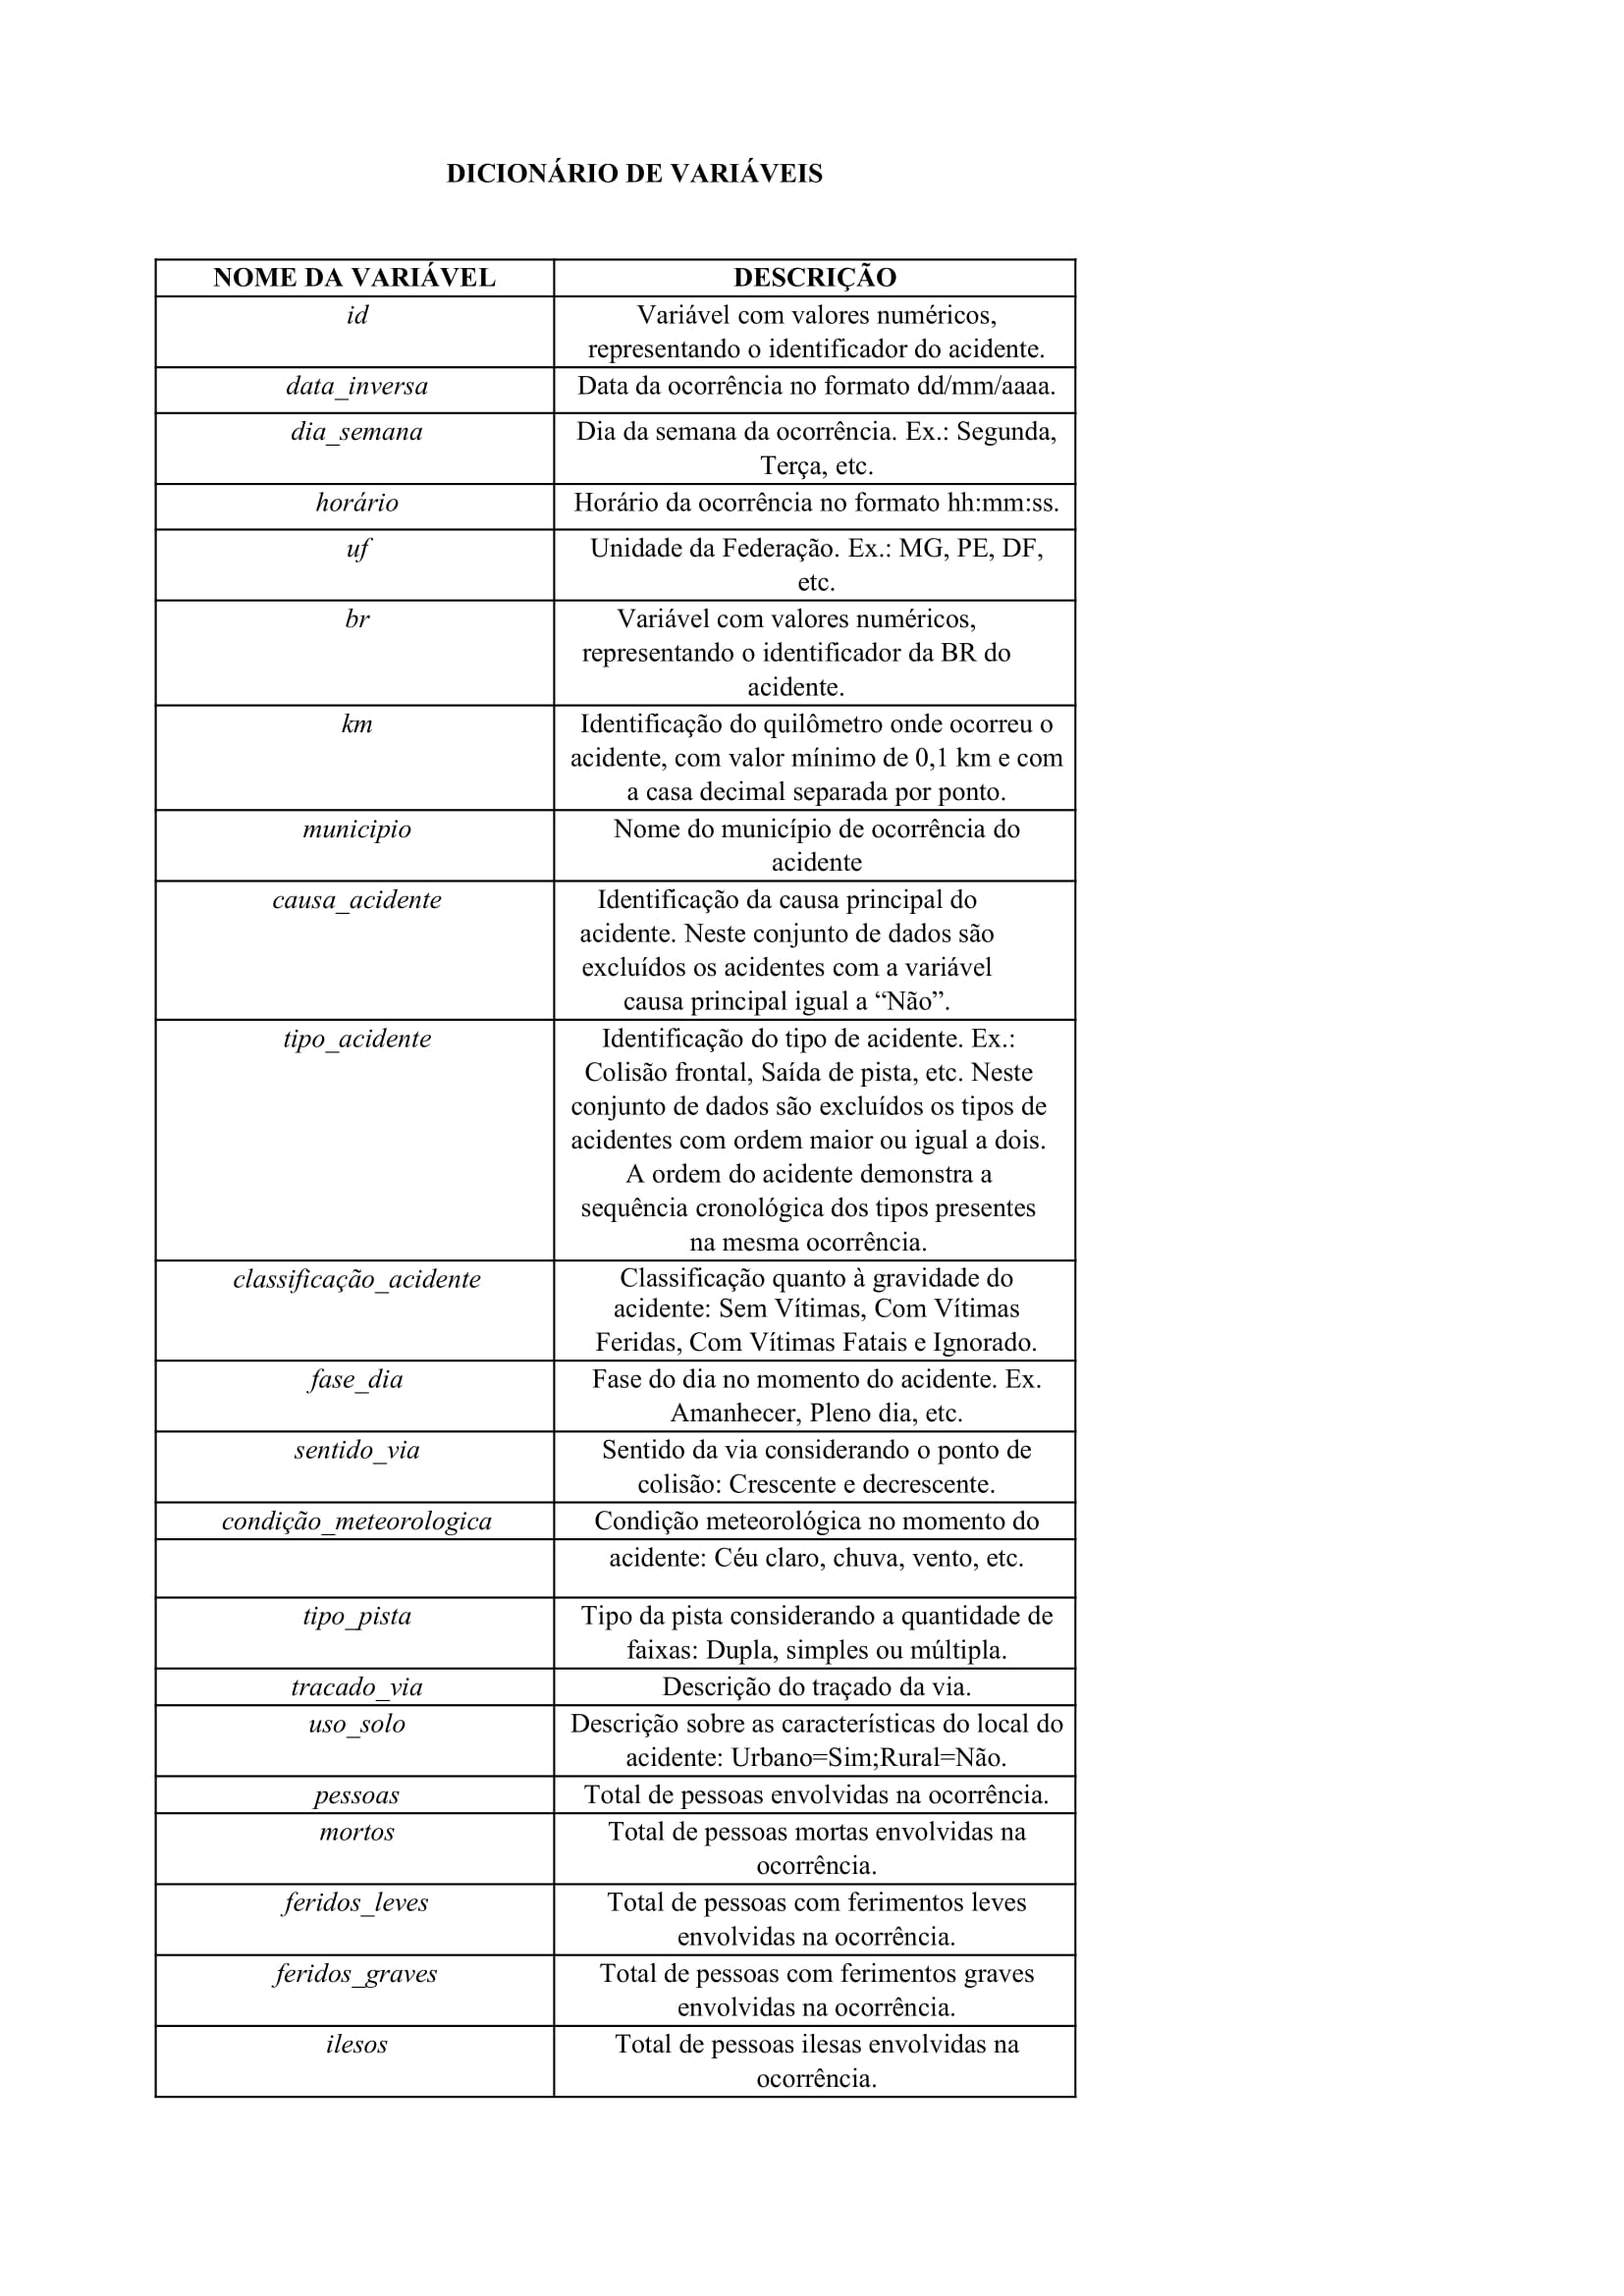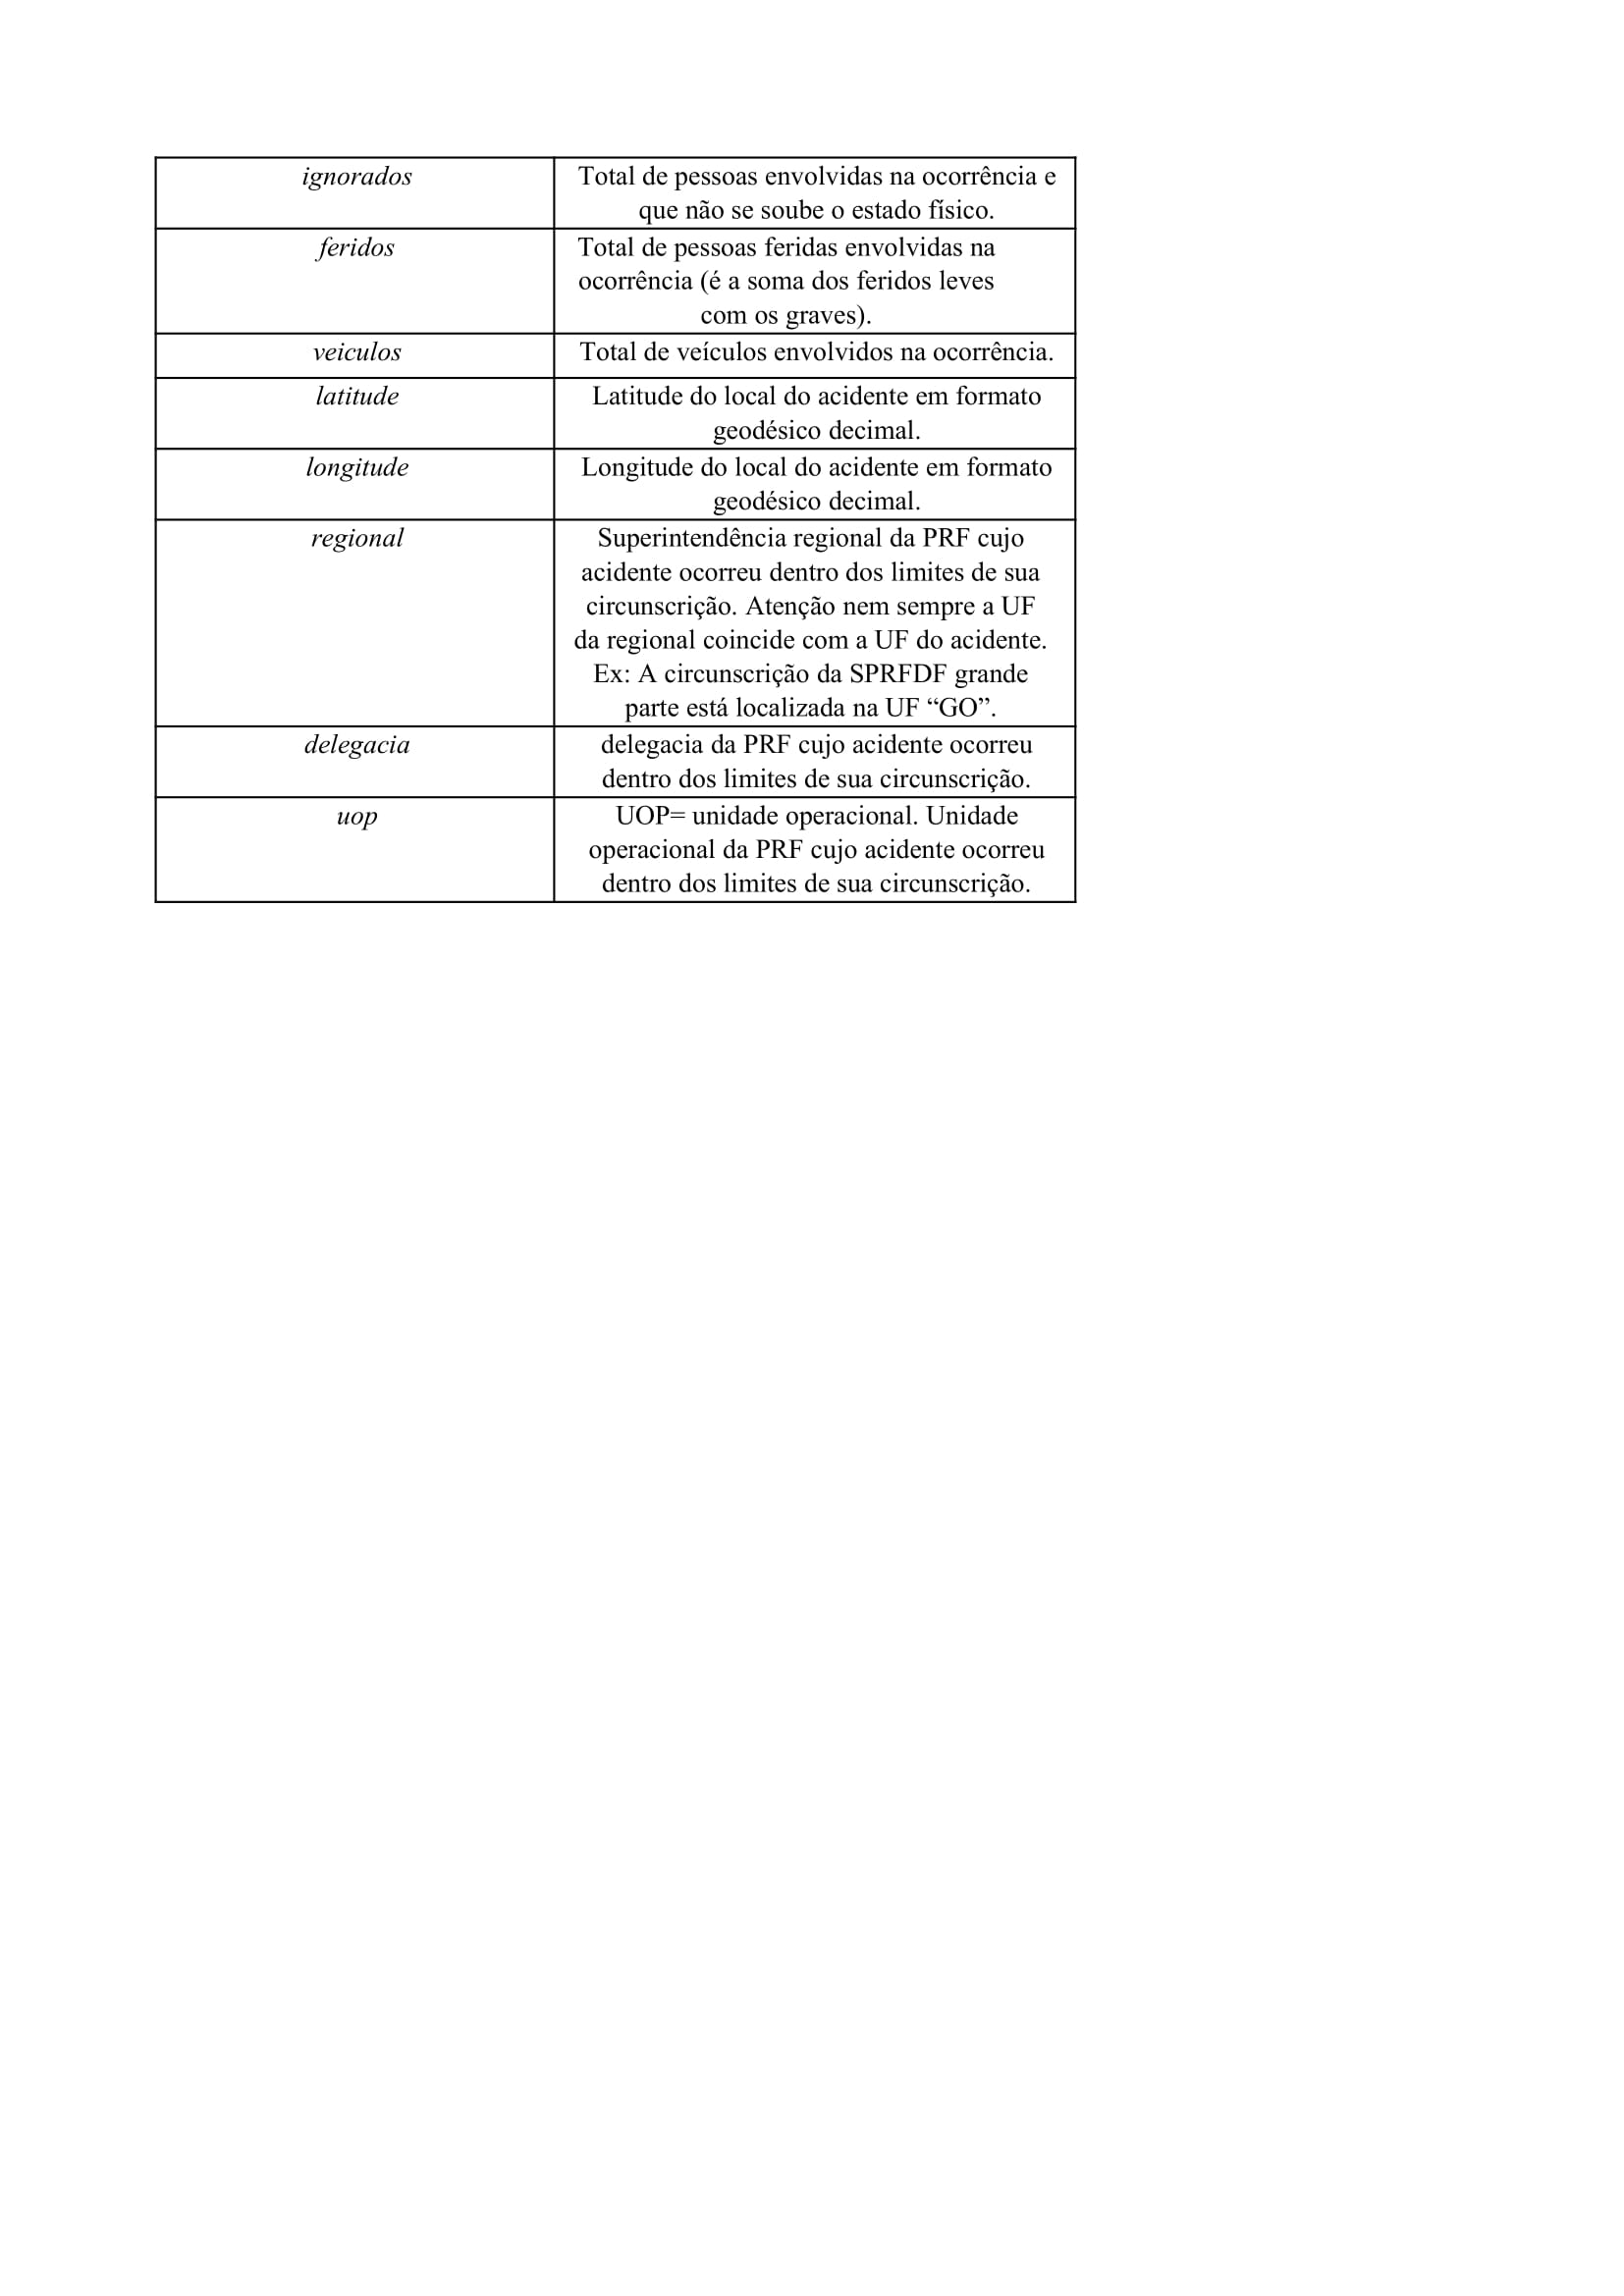

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset PRF.

In [ ]:
### Mapeando bibliotecas necessárias para o projeto
# https://pandas.pydata.org/docs/user_guide/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# carregamento do dataset (aqui, ele fica disponível nesse método)
df_prf_oco_01 = pd.read_csv('/content/drive/MyDrive/PRF/datatran2025.csv',
                            delimiter=';',
                            encoding='ISO-8859-1' #'utf-8' 'latin1'
                            )
df_prf_oco_01.shape

(28598, 30)

In [ ]:
# primeiras linhas
pd.set_option('display.max_columns',None)
df_prf_oco_01.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Múltipla,Reta;Declive,Sim,2,0,1,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,6,1,1,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Dupla,Reta;Aclive,Sim,5,0,3,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,5,0,1,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva;Declive,Não,5,0,1,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset PRF, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset PRF possui 28598 instâncias (observações), distribuídas entre 30 colunas. Dez variáveis são de tipo numérico (int), enquanto os outros vinte atributos são categóricos.

In [ ]:
print(f"Total de instâncias: {len(df_prf_oco_01)}")
print("\nTipos de dados por coluna:")
print(df_prf_oco_01.info())

Total de instâncias: 28598

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28598 entries, 0 to 28597
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      28598 non-null  int64 
 1   data_inversa            28598 non-null  object
 2   dia_semana              28598 non-null  object
 3   horario                 28598 non-null  object
 4   uf                      28598 non-null  object
 5   br                      28598 non-null  int64 
 6   km                      28598 non-null  object
 7   municipio               28598 non-null  object
 8   causa_acidente          28598 non-null  object
 9   tipo_acidente           28597 non-null  object
 10  classificacao_acidente  28596 non-null  object
 11  fase_dia                28598 non-null  object
 12  sentido_via             28598 non-null  object
 13  condicao_metereologica  28598 non-null  object
 14 

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# Estatística descritiva apenas para numéricas
df_prf_oco_01.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000
mean,672070.633191,207.917407,2.595741,0.082418,0.885237,0.272746,1.051053,0.387929,1.157983,1.988775
std,13697.933884,128.190342,2.216941,0.334135,1.030455,0.598706,1.842502,0.802318,1.115623,1.084231
min,652468.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,660616.250000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,668510.500000,153.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,687534.750000,316.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,699634.000000,495.000000,71.000000,9.000000,41.000000,14.000000,71.000000,18.000000,49.000000,31.000000


In [ ]:
# Estatística descritiva completa
df_prf_oco_01.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
count,28598.000000,28598,28598,28598,28598,28598.000000,28598,28598,28598,28597,28596,28598,28598,28598,28598,28598,28598,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598.000000,28598,28598,28598,28591,28586
unique,NaN,151,7,1253,27,NaN,5742,1661,69,17,3,4,3,8,3,422,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26301,26285,28,153,393
top,NaN,2025-05-10,sábado,19:00:00,MG,NaN,3,BRASILIA,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-22,7934208","-43,46276495",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,264,4604,423,3644,NaN,153,401,4307,5635,22215,16186,15250,17934,13671,15983,16282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,12,3637,1038,459
mean,672070.633191,NaN,NaN,NaN,NaN,207.917407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.595741,0.082418,0.885237,0.272746,1.051053,0.387929,1.157983,1.988775,NaN,NaN,NaN,NaN,NaN
std,13697.933884,NaN,NaN,NaN,NaN,128.190342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.216941,0.334135,1.030455,0.598706,1.842502,0.802318,1.115623,1.084231,NaN,NaN,NaN,NaN,NaN
min,652468.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,660616.250000,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,668510.500000,NaN,NaN,NaN,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,687534.750000,NaN,NaN,NaN,NaN,316.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN




* Quantidade de Observações: Existem 28.598 registros no conjunto de dados. Isso indica uma quantidade considerável de incidentes registrados.

* Valores Nulos: Algumas colunas, como br e km, têm menos observações do que o total de registros, indicando a presença de valores nulos.

* Incidentes por Dia: O dia com mais incidentes é o "sábado" (4.604 registros), o que pode indicar que os finais de semana têm uma frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia.

* Localização dos Incidentes: A maioria dos incidentes ocorre em Minas Gerais (MG), com 3.644 registros.

* Causa mais Comum: A causa mais frequente de incidentes é a "Ausência de reação do condutor", ocorrendo 4.307 vezes.

* Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 5.635 vezes.

* Quantidade de Veículos Envolvidos: Em média, cada incidente envolve aproximadamente 1.98 veículos.

* Vítimas: A média de feridos por incidente é de 1,15, com um máximo de 49 feridos em um único incidente. Além disso, a média de feridos graves por incidente é de 0,27.

* Distribuição de Incidentes ao Longo do Ano: O dia com o maior número de incidentes registrados é "2025-05-10", com 264 incidentes.

* Diversidade de Causas e Tipos: Há 69 causas diferentes de acidentes e 17 tipos diferentes de acidentes listados no conjunto de dados.



### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df_prf_oco_01.describe().loc['mean']

,mean
id,672070.633191
br,207.917407
pessoas,2.595741
mortos,0.082418
feridos_leves,0.885237
feridos_graves,0.272746
ilesos,1.051053
ignorados,0.387929
feridos,1.157983
veiculos,1.988775


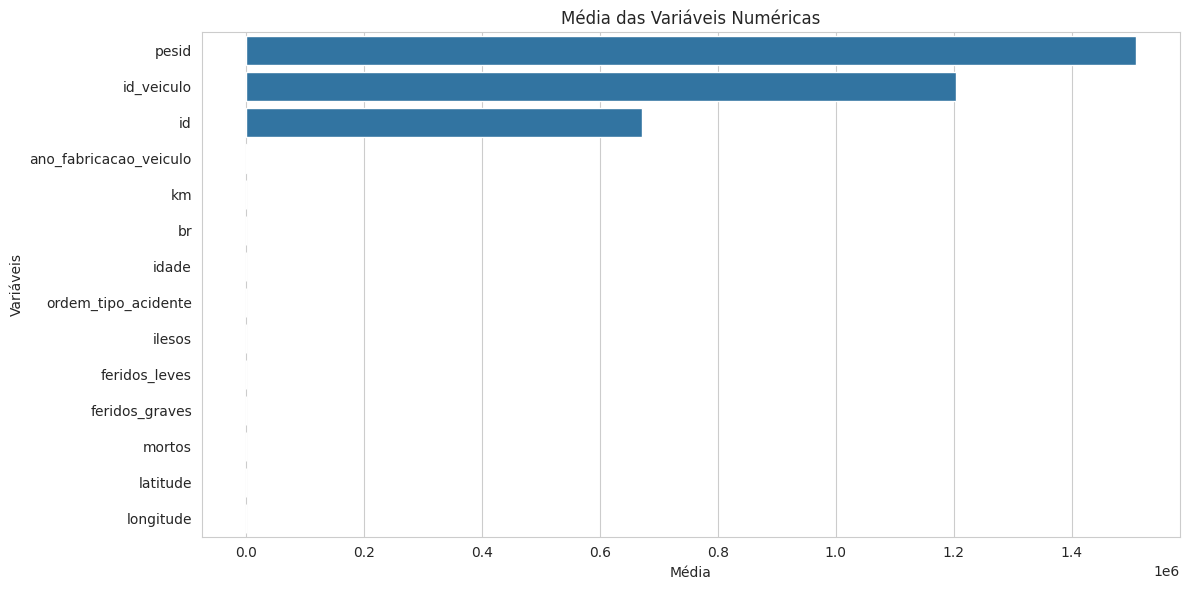

In [ ]:
# Barplot das médias por variável numérica
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas numéricas do dataset
df_numericas = df_prf_oco_01.select_dtypes(include=['float64','int64'])

# Calcular a média
mean_series = df_numericas.mean().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_series.values, y=mean_series.index)
plt.title("Média das Variáveis Numéricas")
plt.xlabel("Média")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()


### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df_prf_oco_01.describe().loc['std']

,std
id,13697.933884
br,128.190342
pessoas,2.216941
mortos,0.334135
feridos_leves,1.030455
feridos_graves,0.598706
ilesos,1.842502
ignorados,0.802318
feridos,1.115623
veiculos,1.084231


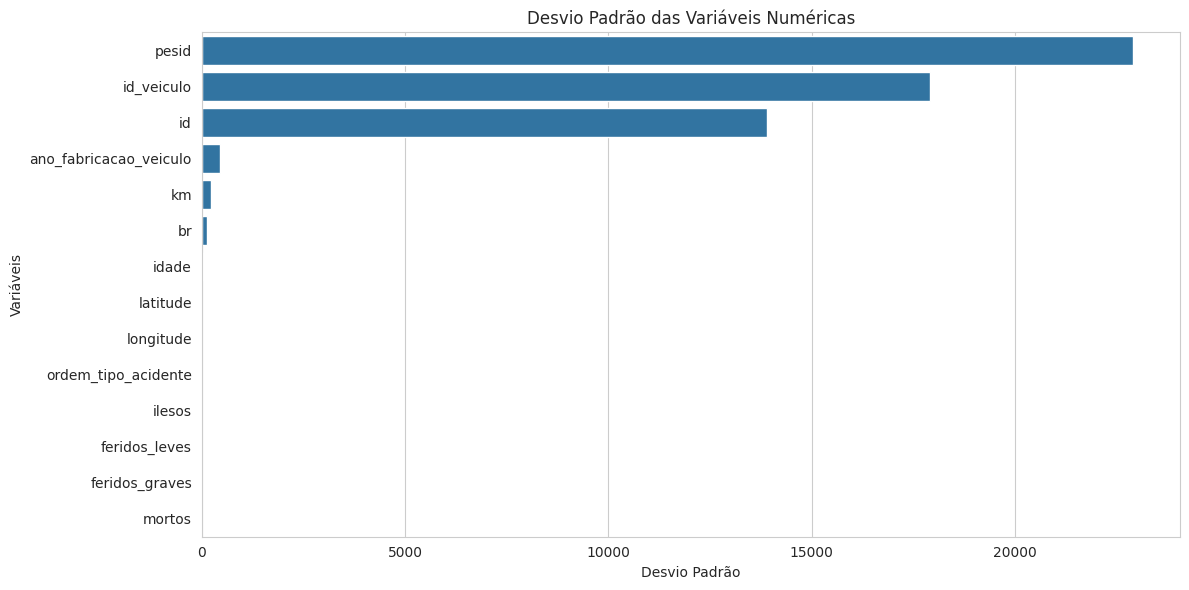

In [ ]:
# Gráfico barplot com os desvios padrão de cada coluna numérica
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar colunas numéricas do dataset
df_numericas = df_prf_oco_01.select_dtypes(include=['float64','int64'])

# Calcular o desvio padrão
std_series = df_numericas.std().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=std_series.values, y=std_series.index)
plt.title("Desvio Padrão das Variáveis Numéricas")
plt.xlabel("Desvio Padrão")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

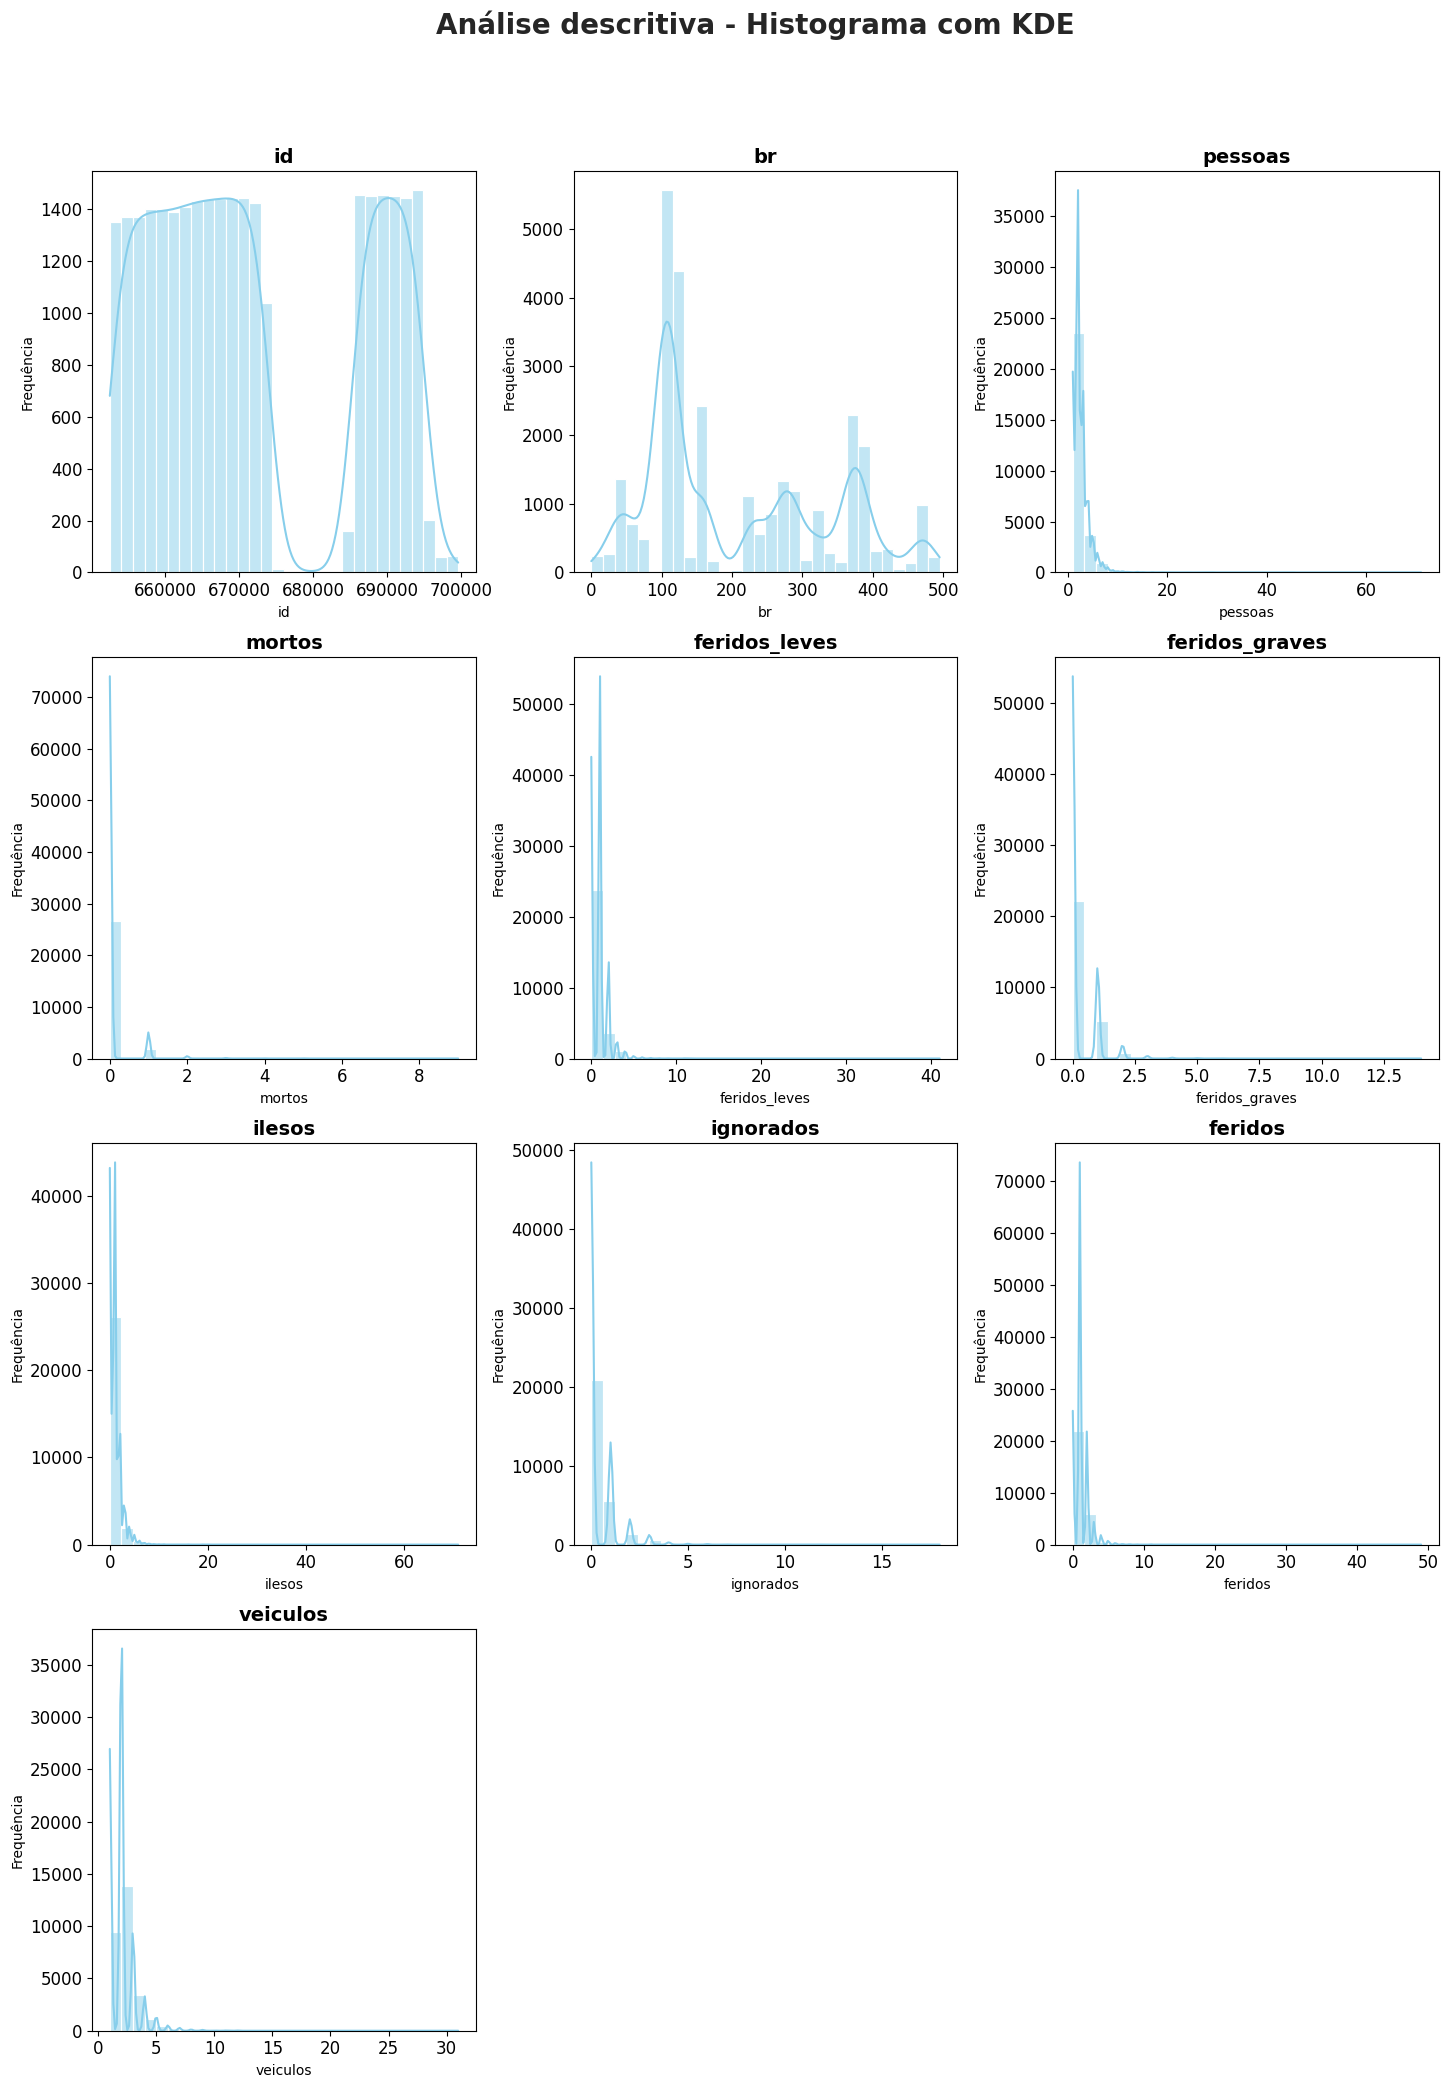

In [ ]:
def prf_histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
prf_histograms(df_prf_oco_01)

**Distribuição:**

* Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero. Isso é consistente com os boxplots.

**Modas:**

* A maioria das variáveis tem uma única moda, indicando uma distribuição unimodal.

**Assimetria:**

* Muitas das variáveis mostram uma assimetria positiva, com uma "cauda" à direita. Isso indica que a maioria dos incidentes envolve poucas pessoas ou tem poucas vítimas, mas há casos raros (outliers) com um número elevado de pessoas envolvidas ou vítimas.

**Outliers e Valores Atípicos:**

* Como os histogramas mostram a frequência de valores, é difícil identificar outliers diretamente. No entanto, a presença de uma "cauda" longa em um histograma pode indicar a presença de outliers.

**Concentração de Dados:**

* A altura das barras do histograma indica a frequência de valores. Assim, podemos ver que a maioria dos incidentes não resulta em mortes ou ferimentos graves.

## Boxplots
Visualizar as distribuições das variáveis por meio de boxplots também nos permite comparar a média, mediana e desvio padrão de cada característica.


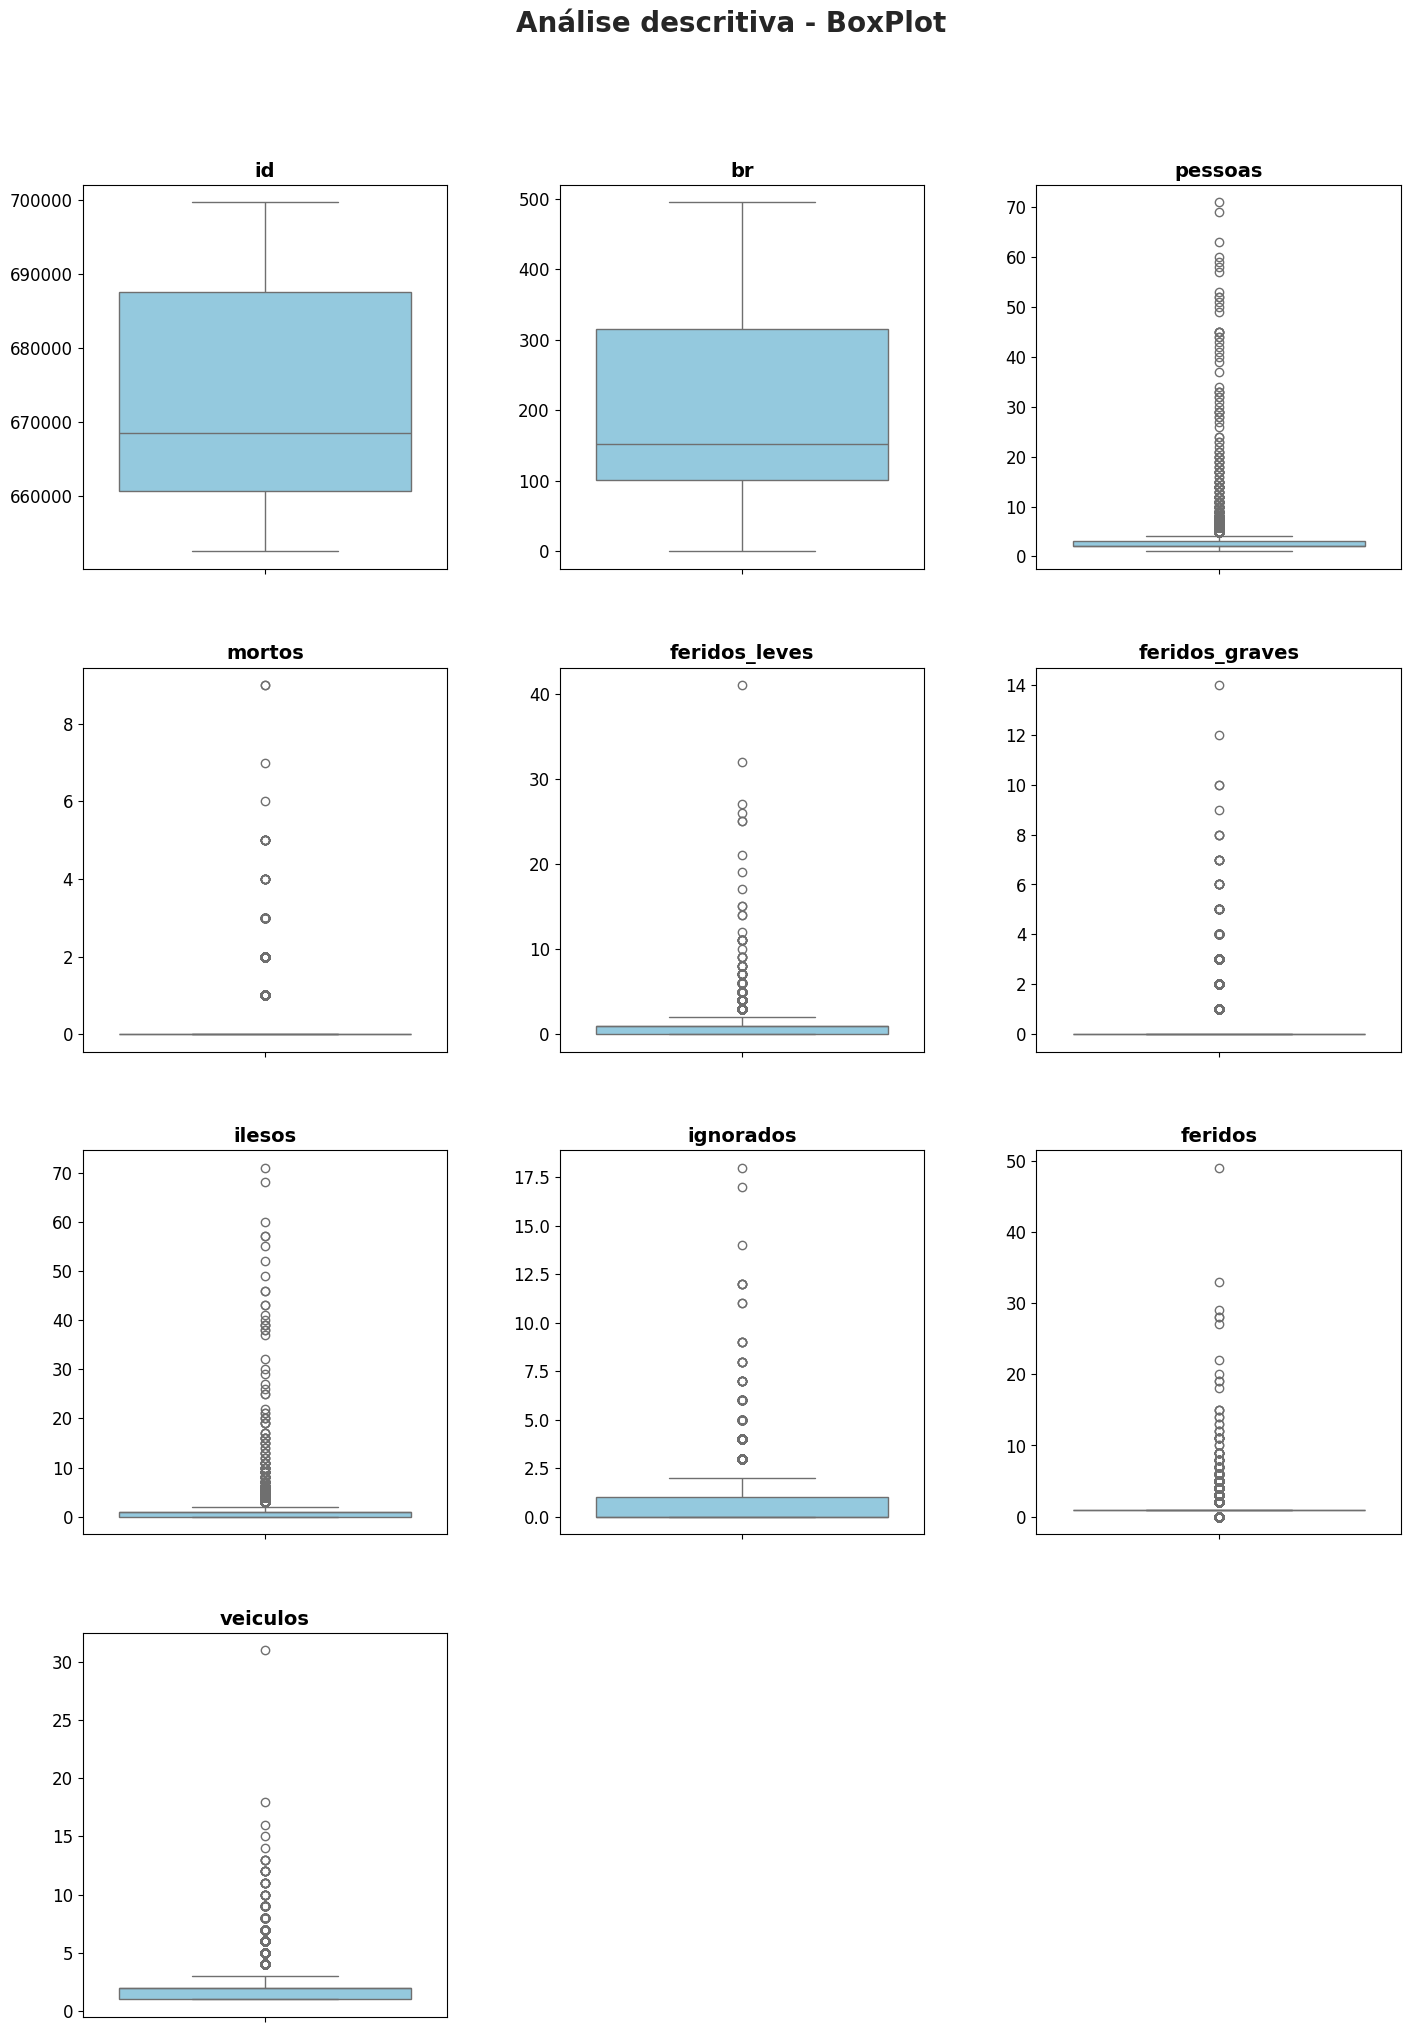

In [ ]:
def prf_oco_01_box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
prf_oco_01_box_plot(df_prf_oco_01)

**Variabilidade e Distribuição:**

* Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero, indicando que muitos incidentes envolvem poucas pessoas ou nenhuma vítima. No entanto, existem alguns valores atipicamente altos para estas variáveis, sugerindo que, embora raros, existem incidentes com um número significativo de envolvidos ou vítimas.

**Outliers:**

* Muitas das variáveis apresentam outliers. Estes são pontos que podem indicar valores atipicamente altos ou baixos. Por exemplo, a variável pessoas tem vários valores que são consideravelmente mais altos do que a mediana, sugerindo incidentes com um número anormalmente alto de pessoas envolvidas. Os outliers podem indicar tanto erros de entrada de dados quanto eventos reais que são atípicos. Eles podem ser investigados mais a fundo para entender sua natureza.

**Concentração de Dados:**

* A linha central do box (mediana) para variáveis como mortos, feridos_leves, feridos_graves, e ilesos está no valor zero. Isso indica que a maioria dos incidentes não resulta em mortes ou ferimentos.

**Amplitude dos Dados:**

* O intervalo interquartil (IQR), que é a altura da caixa no boxplot, indica onde reside a metade central dos dados. Para muitas das variáveis, o IQR é pequeno, mostrando que os valores estão concentrados. Por outro lado, uma caixa maior indica maior variabilidade nos dados.

**Tendências e Anomalias:**

* Se os dados estivessem distribuídos em grupos ou categorias (como diferentes estados ou tipos de incidentes), poderíamos usar boxplots para comparar essas categorias e identificar tendências ou anomalias específicas de cada grupo. Estes são insights gerais que podem ser obtidos a partir dos boxplots.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

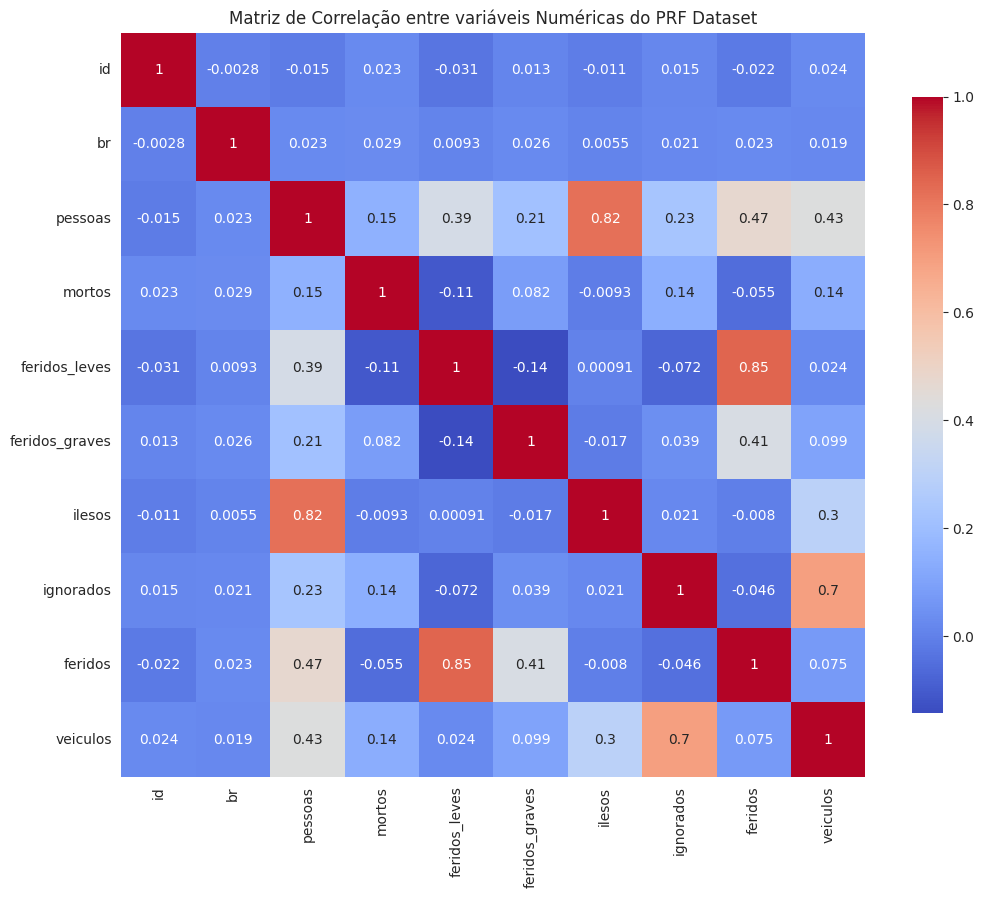

In [ ]:
# Matriz de correlação
df_numericas = df_prf_oco_01.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12, 10))
correlation_matrix = df_numericas.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',square = True, cbar_kws = {'shrink': .8})
plt.title('Matriz de Correlação entre variáveis Numéricas do PRF Dataset')
plt.show()

Algumas variáveis apresentam correlação forte entre si, o que pode indicar redundância ou interdependência. Por exemplo, é comum encontrar correlação entre o número de feridos e o número de vítimas, já que ambos medem consequências do acidente.

A presença de valores próximos de zero entre muitas variáveis indica baixa correlação linear, o que sugere independência ou relação não-linear entre os atributos.

A matriz pode ser útil para eliminar colinearidade em modelos lineares ou para selecionar variáveis mais informativas, além de fornecer insights para criação de novas variáveis.

## Tratamento de Valores Nulos

No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset PRF:")
df_prf_oco_01.isnull().sum()

Valores nulos no dataset PRF:


,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,1


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregar dataset (ajuste sep e decimal conforme seu CSV) ---
df_prf_oco_01 = pd.read_csv('/content/drive/MyDrive/PRF/acidentes2025_todas_causas_tipos.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# --- 2. Separar features (X) e target (y) ---
# Substitua 'target' pelo nome correto da coluna que você quer prever
target_column = 'classificacao_acidente'
X = df_prf_oco_01.drop(target_column, axis=1)
y = df_prf_oco_01[target_column]

In [ ]:
# --- 3. Separar colunas numéricas (para scaler) ---
colunas_numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# --- 4. Dividir os dados em treino e teste ---
# Remove rows with missing target values before splitting
X_cleaned = X # X already has the target column dropped
y_cleaned = y.dropna()

# Ensure X_cleaned and y_cleaned have the same index after dropping rows
X_cleaned = X_cleaned.loc[y_cleaned.index]


X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned
)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (162326, 36)
Dimensões de X_test: (69569, 36)
Dimensões de y_train: (162326,)
Dimensões de y_test: (69569,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

In [ ]:
scaler_norm = MinMaxScaler()
# Ajusta scaler APENAS com dados de treino
scaler_norm.fit(X_train[colunas_numericas])

# Transforma os dados numéricos de treino e teste
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm[colunas_numericas] = scaler_norm.transform(X_train[colunas_numericas])
X_test_norm[colunas_numericas] = scaler_norm.transform(X_test[colunas_numericas])

# Visualizar primeiras linhas dos dados normalizados
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(X_train_norm.head())


Primeiras 5 linhas dos dados normalizados (treino):
              id     pesid data_inversa     dia_semana   horario  uf  \
109978  0.327079  0.445726   2025-03-17  segunda-feira  17:00:00  RS   
188677  0.787919  0.732542   2025-05-07   quarta-feira  09:20:00  GO   
93971   0.277912  0.380124   2025-03-06   quinta-feira  18:30:00  SC   
141087  0.418691  0.559974   2025-04-07  segunda-feira  14:30:00  RS   
176927  0.753106  0.686746   2025-04-29    terça-feira  07:00:00  GO   

              br        km         municipio causa_principal  \
109978  0.577320  0.245823  CACHOEIRA DO SUL             Sim   
188677  0.294845  0.230947            RIALMA             Não   
93971   0.556701  0.104455      RIO NEGRINHO             Sim   
141087  0.567010  0.082737           VACARIA             Não   
176927  0.103093  0.080986          ANAPOLIS             Sim   

                                  causa_acidente  ordem_tipo_acidente  \
109978                   Velocidade Incompatível        

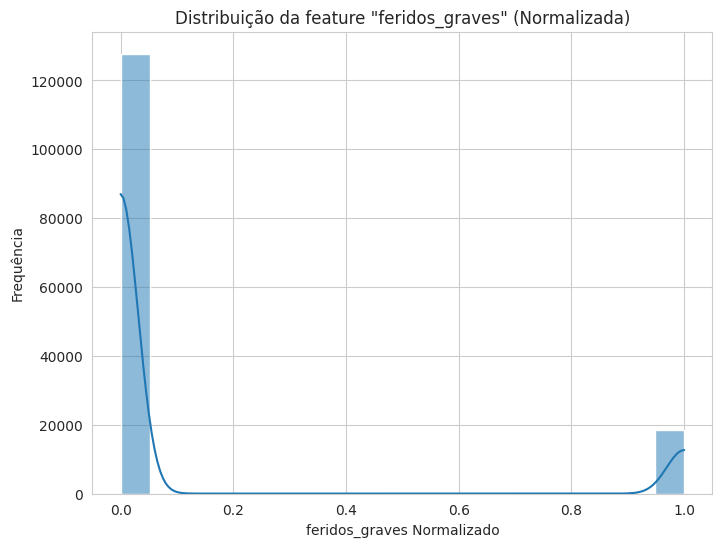

In [ ]:
# Visualizar a distribuição de uma feature numérica exemplo
if len(colunas_numericas) > 10:
    feature_exemplo = colunas_numericas[10]
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train_norm[feature_exemplo], kde=True)
    plt.title(f'Distribuição da feature "{feature_exemplo}" (Normalizada)')
    plt.xlabel(f'{feature_exemplo} Normalizado')
    plt.ylabel('Frequência')
    plt.show()

O histograma da variável feridos_graves após a normalização mostra que os valores foram reescalados para o intervalo de 0 a 1. A forma geral da distribuição foi preservada, evidenciando que a transformação não alterou a estrutura dos dados, apenas ajustou sua escala.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
scaler_std = StandardScaler()
# Ajusta scaler APENAS com dados de treino
scaler_std.fit(X_train[colunas_numericas])

# Transforma os dados numéricos de treino e teste
X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[colunas_numericas] = scaler_std.transform(X_train[colunas_numericas])
X_test_std[colunas_numericas] = scaler_std.transform(X_test[colunas_numericas])

# Visualizar primeiras linhas dos dados padronizados
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(X_train_std.head())


Primeiras 5 linhas dos dados padronizados (treino):
              id     pesid data_inversa     dia_semana   horario  uf  \
109978 -0.309825 -0.044729   2025-03-17  segunda-feira  17:00:00  RS   
188677  1.253242  1.071050   2025-05-07   quarta-feira  09:20:00  GO   
93971  -0.476588 -0.299936   2025-03-06   quinta-feira  18:30:00  SC   
141087  0.000904  0.399723   2025-04-07  segunda-feira  14:30:00  RS   
176927  1.135164  0.892894   2025-04-29    terça-feira  07:00:00  GO   

              br        km         municipio causa_principal  \
109978  0.553183  0.127060  CACHOEIRA DO SUL             Sim   
188677 -0.529676  0.046432            RIALMA             Não   
93971   0.474142 -0.639123      RIO NEGRINHO             Sim   
141087  0.513663 -0.756832           VACARIA             Não   
176927 -1.264756 -0.766318          ANAPOLIS             Sim   

                                  causa_acidente  ordem_tipo_acidente  \
109978                   Velocidade Incompatível        

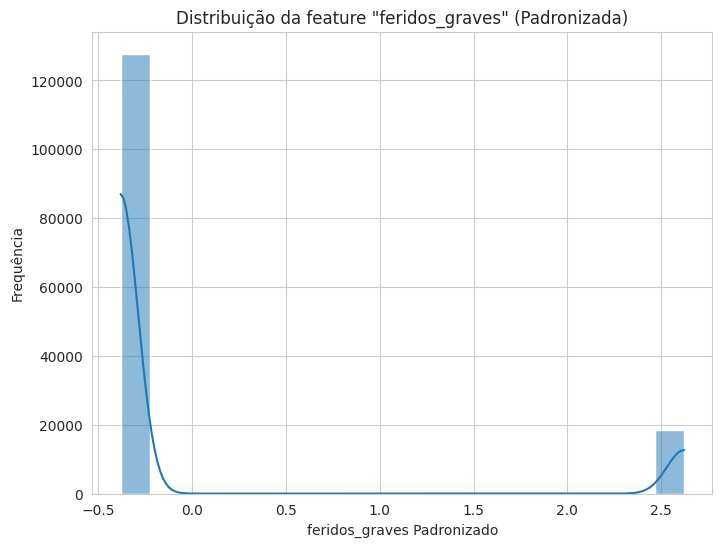

In [ ]:
# Visualizar a distribuição de uma feature numérica exemplo
if len(colunas_numericas) > 10:
    feature_exemplo = colunas_numericas[10]
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train_std[feature_exemplo], kde=True)
    plt.title(f'Distribuição da feature "{feature_exemplo}" (Padronizada)')
    plt.xlabel(f'{feature_exemplo} Padronizado')
    plt.ylabel('Frequência')
    plt.show()

O histograma da variável feridos_graves após a padronização indica que os valores foram transformados para terem média próxima de zero e desvio padrão igual a um. A distribuição foi centralizada e assumiu uma forma simétrica em torno do zero.

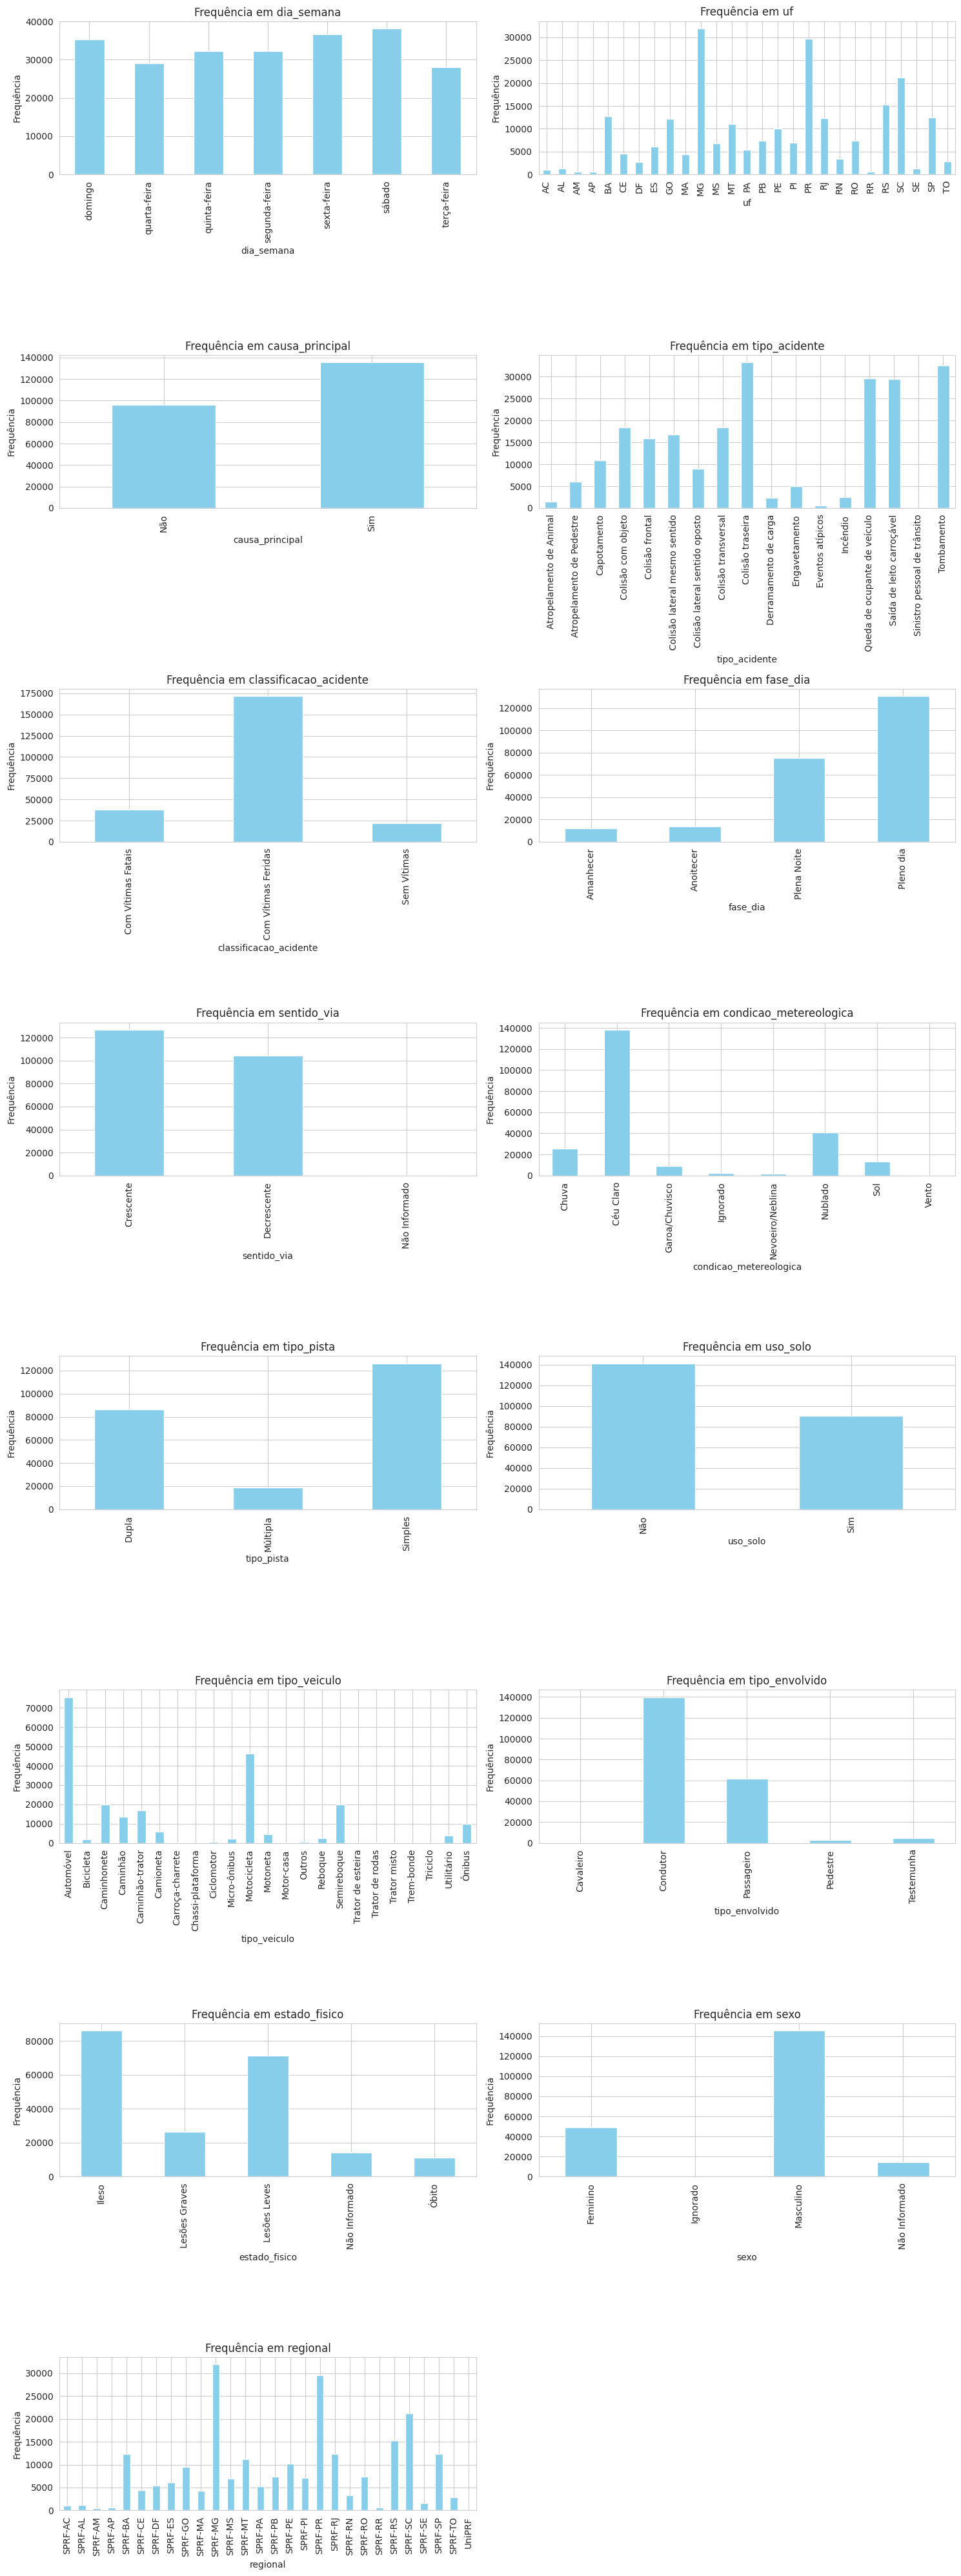

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_prf_oco_01, corte_cardinalidade=30, graficos_por_linha=2)

**Dias da Semana (dia_semana)**:
- A maioria dos registros parece ocorrer nos finais de semana (sábado e sexta-feira). Isso pode indicar um aumento de atividades ou eventos que resultam em mais registros nesses dias.

**UF (Estados)**:
- Alguns estados têm uma contagem mais alta de registros em comparação com outros. É essencial considerar a população e o tamanho de cada estado ao interpretar esses dados. Por exemplo, estados mais populosos ou com maiores redes rodoviárias podem naturalmente ter mais registros.

**Causa do Acidente (causa_acidente)**:
- Alguns motivos parecem ser mais predominantes que outros. Por exemplo, Ausência de reação do condutor parece ser uma causa comum, o que pode indicar a necessidade de maior atenção aos eventos da pista para antever e proporcionar oportunidades de ação imediata.

**Classificação do Acidente (classificacao_acidente)**:
- A maioria dos acidentes parece ser sem vítimas ou com feridos leves, o que é uma boa notícia. No entanto, ainda há uma quantidade significativa de acidentes com feridos graves e mortos, ressaltando a importância da segurança no trânsito.

**Fase do Dia (fase_dia)**:
- Os acidentes parecem ser mais comuns durante o dia e à noite. Isso pode estar relacionado às horas de pico de tráfego e à visibilidade reduzida.

**Condição Meteorológica (condicao_metereologica)**:
- A maioria dos registros ocorre em condições claras, o que é esperado, mas também destaca que condições adversas, como chuva ou neblina, não são os principais contribuintes para os acidentes, embora possam aumentar sua gravidade.

**Tipo de Pista (tipo_pista)**:
- A maioria dos registros ocorre em pistas simples, o que pode indicar que essas pistas apresentam mais riscos ou que são mais comuns nas áreas abrangidas pelos dados.

# Conclusão

A análise e pré-processamento do dataset da Polícia Rodoviária Federal revelaram insights importantes sobre os fatores que influenciam a gravidade dos acidentes nas rodovias brasileiras. A limpeza e transformação dos dados foram etapas fundamentais para tornar as variáveis adequadas à modelagem, considerando a diversidade de tipos e formatos originais.

A análise exploratória permitiu identificar padrões relevantes, como a influência de condições climáticas, tipo de pista e horário do acidente sobre a severidade dos casos. Visualizações como gráficos de barras, bloxpots e histogramas foram essenciais para revelar essas correlações de forma clara e acessível.

As hipóteses levantadas foram validadas com os seguintes resultados:

**1.** Certas condições climáticas ou de iluminação aumentam a gravidade dos acidentes?
Sim. Acidentes sob chuva apresentaram maior gravidade. Quanto ao horário, a maioria dos acidentes ocorreu durante o dia e à noite — provavelmente por serem períodos de maior movimento nas rodovias, tanto por deslocamentos rotineiros quanto por viagens mais longas. Já o menor número de acidentes ao amanhecer e ao anoitecer reflete a menor quantidade de veículos nas estradas nesses momentos, além de possíveis efeitos de redução de visibilidade e cautela dos motoristas.

**2.** O tipo de pista e o traçado da via influenciam o número de vítimas?
Sim. Pistas simples e curvas mostraram-se mais perigosas, com maior incidência de acidentes com vítimas fatais.

**3.** É possível prever a gravidade do acidente com base nas variáveis disponíveis?
Sim. Modelos de classificação treinados com os atributos disponíveis apresentaram desempenho aceitável, indicando que as variáveis são informativas para essa tarefa.

**4.** Existe um padrão temporal para a ocorrência de acidentes mais graves?
Sim. Finais de semana e feriados concentram maior número de acidentes graves, sugerindo uma relação com aumento do fluxo de veículos e comportamento de risco.

Essas conclusões reforçam a importância dos dados abertos da PRF como ferramenta para apoiar políticas públicas de segurança viária. O uso de técnicas de ciência de dados pode auxiliar na antecipação de riscos e na elaboração de estratégias preventivas mais eficazes.